In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [522]:
data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022copy3.csv")

In [523]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [524]:
print(data)

         Tanggal OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude  \
0       1/1/2017   04:58:14   -8.9300   110.0500              10        4.0   
1       1/2/2017   21:02:24   -8.9400   108.7500              10        5.3   
2       1/3/2017   03:52:37   -8.3900   110.6900              10        3.1   
3       1/4/2017   00:44:38   -9.2700   113.4800              10        3.4   
4       1/5/2017   20:07:56   -9.8100   111.7500              10        3.2   
...          ...        ...       ...        ...             ...        ...   
2177  12/27/2022   00:38:27   -7.8601   110.5298              13        1.3   
2178  12/28/2022   02:19:49   -8.8718   112.4565              44        3.2   
2179  12/29/2022   00:33:56   -9.0316   112.1481              10        3.2   
2180  12/30/2022   00:02:38  -10.2996   113.2803              10        3.6   
2181  12/31/2022   01:02:38  -10.2996   113.2803              10        3.6   

     Type                                         K

In [525]:
train_dates = pd.to_datetime(data['Tanggal'])

In [526]:
cols = list(data)[2:6]

In [527]:
print(cols)

['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']


In [528]:
data_for_training = data[cols].astype(float)

In [529]:
scaler = StandardScaler()
scaler = scaler.fit(data_for_training)
data_for_training_scaled = scaler.transform(data_for_training)

In [530]:
train_X = []
train_y = []

In [531]:
n_future = 1
n_past = 30

for i in range(n_past, len(data_for_training_scaled) - n_future +1):
    train_X.append(data_for_training_scaled[i - n_past:i, 0:data_for_training.shape[1]])
    train_y.append(data_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [532]:
train_X, train_y = np.array(train_X), np.array(train_y)

In [533]:
X_valid, X_training, y_valid, y_training = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [534]:
print('train_X shape =={}.'.format(train_X.shape))
print('train_y shape =={}.'.format(train_y.shape))

train_X shape ==(2152, 30, 4).
train_y shape ==(2152, 1).


In [535]:
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
# Third LSTM layer
model.add(LSTM(units=32, activation='relu', return_sequences=True))
# Fourth LSTM layer
model.add(LSTM(units=16, activation='relu'))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 30, 128)           68096     
                                                                 
 dropout_48 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_103 (LSTM)             (None, 30, 64)            49408     
                                                                 
 lstm_104 (LSTM)             (None, 30, 64)            33024     
                                                                 
 lstm_105 (LSTM)             (None, 30, 32)            12416     
                                                                 
 lstm_106 (LSTM)             (None, 16)                3136      
                                                                 
 dropout_49 (Dropout)        (None, 16)              

In [536]:
optimizer=Adam(learning_rate=0.001)

In [537]:
model.compile(optimizer=optimizer, loss='mse')

In [538]:
history = model.fit(X_training, y_training, epochs=1000, batch_size=64, validation_data=(X_valid, y_valid), verbose=1, callbacks=[checkpoint])

Epoch 1/1000


7/7 [==============================] - ETA: 0s - loss: 1.2333
Epoch 1: val_loss improved from inf to 0.94393, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
7/7 [==============================] - 11s 1s/step - loss: 1.2333 - val_loss: 0.9439
Epoch 2/1000
7/7 [==============================] - ETA: 0s - loss: 1.2308
Epoch 2: val_loss did not improve from 0.94393
7/7 [==============================] - 6s 1s/step - loss: 1.2308 - val_loss: 0.9475
Epoch 3/1000
7/7 [==============================] - ETA: 0s - loss: 1.2234
Epoch 3: val_loss did not improve from 0.94393
7/7 [==============================] - 6s 988ms/step - loss: 1.2234 - val_loss: 0.9501
Epoch 4/1000
7/7 [==============================] - ETA: 0s - loss: 1.2243
Epoch 4: val_loss did not improve from 0.94393
7/7 [==============================] - 6s 999ms/step - loss: 1.2243 - val_loss: 0.9485
Epoch 5/1000
7/7 [==============================] - ETA: 0s - loss: 1.2206
Epoch 5: val_loss did n

KeyboardInterrupt: 

In [ ]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5")
loss = model.evaluate(X_valid, y_valid)
print("Loss:", loss)

54/54 [==============================] - 2s 30ms/step - loss: 0.9308
Loss: 0.9308082461357117


In [ ]:
n_past = 1
n_days_for_prediction=366
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-16 00:00:00'), Timestamp('2023-01-17 00:00:00'), Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-28 00:00:00'), Timestamp('20

In [ ]:
prediction = model.predict(X_training[-n_days_for_prediction:])

12/12 [==============================] - 1s 27ms/step


In [ ]:
print(prediction)

[[ 5.45992367e-02]
 [-9.47407335e-02]
 [ 1.01609811e-01]
 [-4.54705469e-02]
 [ 9.31413174e-02]
 [ 6.75216317e-03]
 [ 7.84108192e-02]
 [ 5.97423688e-02]
 [-1.55816615e-01]
 [ 1.55500695e-03]
 [ 7.06236064e-02]
 [-4.00791802e-02]
 [-2.01642483e-01]
 [ 6.04233444e-02]
 [ 5.29828817e-02]
 [ 5.23268208e-02]
 [ 1.02561057e-01]
 [ 6.88395202e-02]
 [ 2.31839214e-02]
 [-1.30106628e-01]
 [ 8.01900178e-02]
 [-3.05660814e-02]
 [ 1.13301560e-01]
 [-1.77374527e-01]
 [ 5.34495711e-02]
 [-3.35431136e-02]
 [ 3.86120677e-02]
 [ 4.80385795e-02]
 [-6.31212592e-02]
 [ 1.71865188e-02]
 [-1.02024689e-01]
 [ 7.62006864e-02]
 [-1.61411911e-02]
 [ 9.16812867e-02]
 [ 9.88079906e-02]
 [ 6.57397285e-02]
 [ 4.74058427e-02]
 [ 2.68981047e-02]
 [ 8.72094482e-02]
 [ 6.97273090e-02]
 [-1.51624382e-01]
 [ 3.41199003e-02]
 [ 7.54192024e-02]
 [ 6.94706440e-02]
 [-7.71815628e-02]
 [ 1.00727975e-01]
 [ 4.07515094e-04]
 [ 6.56788349e-02]
 [ 3.15372832e-02]
 [ 1.97504032e-02]
 [-1.60604715e-02]
 [ 7.13780895e-02]
 [ 4.3152876

In [ ]:
prediction_copies = np.repeat(prediction, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,-1]
y_pred_future = np.abs(y_pred_future)

C:\Users\wajit\AppData\Local\Temp\ipykernel_3408\3345504534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Tanggal']=pd.to_datetime(original['Tanggal'])


<Axes: xlabel='Tanggal', ylabel='Magnitude'>

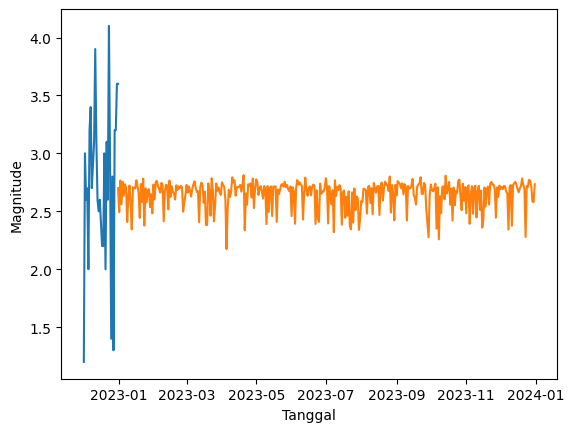

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Tanggal': np.array(forecast_dates), 'Magnitude': y_pred_future})
df_forecast['Tanggal'] = pd.to_datetime(df_forecast['Tanggal'])


original = data[['Tanggal', 'Magnitude']]
original['Tanggal']=pd.to_datetime(original['Tanggal'])
original = original.loc[original['Tanggal'] >= '2022-12-1']

sns.lineplot(x=original['Tanggal'], y=original['Magnitude'])
sns.lineplot(x=df_forecast['Tanggal'], y=df_forecast['Magnitude'])

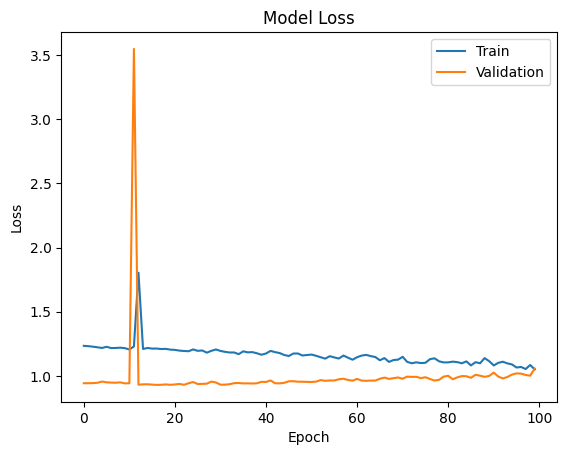

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
print(prediction_copies)

[[ 0.05459924  0.05459924  0.05459924  0.05459924]
 [-0.09474073 -0.09474073 -0.09474073 -0.09474073]
 [ 0.10160981  0.10160981  0.10160981  0.10160981]
 ...
 [-0.02870396 -0.02870396 -0.02870396 -0.02870396]
 [-0.0327472  -0.0327472  -0.0327472  -0.0327472 ]
 [ 0.07817231  0.07817231  0.07817231  0.07817231]]
